<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/World_University_Rankings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/timesData.csv')  # Ensure your file name matches
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45:55:00,2011


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [3]:
df.describe(include='all')

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
count,2603,2603,2603,2603.000000,2603,2603.000000,2603.000000,2603,2603,2544,2544.000000,2536,2370,2603.000000
unique,212,818,72,NaN,804,NaN,NaN,613,415,794,NaN,53,69,NaN
top,301-350,Harvard University,United States of America,NaN,29.6,NaN,NaN,-,-,"20,152",NaN,7%,54:46:00,NaN
freq,248,6,659,NaN,10,NaN,NaN,218,1402,6,NaN,142,185,NaN
mean,NaN,NaN,NaN,37.801498,NaN,35.910257,60.921629,NaN,NaN,NaN,18.445283,NaN,NaN,2014.075682
std,NaN,NaN,NaN,17.604218,NaN,21.254805,23.073219,NaN,NaN,NaN,11.458698,NaN,NaN,1.685733
min,NaN,NaN,NaN,9.900000,NaN,2.900000,1.200000,NaN,NaN,NaN,0.600000,NaN,NaN,2011.000000
25%,NaN,NaN,NaN,24.700000,NaN,19.600000,45.500000,NaN,NaN,NaN,11.975000,NaN,NaN,2013.000000
50%,NaN,NaN,NaN,33.900000,NaN,30.500000,62.500000,NaN,NaN,NaN,16.100000,NaN,NaN,2014.000000
75%,NaN,NaN,NaN,46.400000,NaN,47.250000,79.050000,NaN,NaN,NaN,21.500000,NaN,NaN,2016.000000


In [4]:
df.isnull().sum()

,0
world_rank,0
university_name,0
country,0
teaching,0
international,0
research,0
citations,0
income,0
total_score,0
num_students,59


In [5]:
(df.isnull().sum()/len(df))*100

,0
world_rank,0.000000
university_name,0.000000
country,0.000000
teaching,0.000000
international,0.000000
research,0.000000
citations,0.000000
income,0.000000
total_score,0.000000
num_students,2.266615


In [6]:
#clean numeric columns:
# Clean num_students (remove commas and convert to float)
df['num_students']=df['num_students'].str.replace(',',"").astype(float)

# Clean international_students (remove % and convert to float)
df['international_students']=df['international_students'].str.replace('%','').astype(float)

# Clean female_male_ratio (split into two numbers)
def extract_female_ratio(ratio):
    try:
        female, male = ratio.split(':')
        return float(female) / (float(female) + float(male))
    except:
        return None

df['female_ratio'] = df['female_male_ratio'].apply(extract_female_ratio)

<ipython-input-7-9ef8bf84d510>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['world_rank'] = df['world_rank'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)


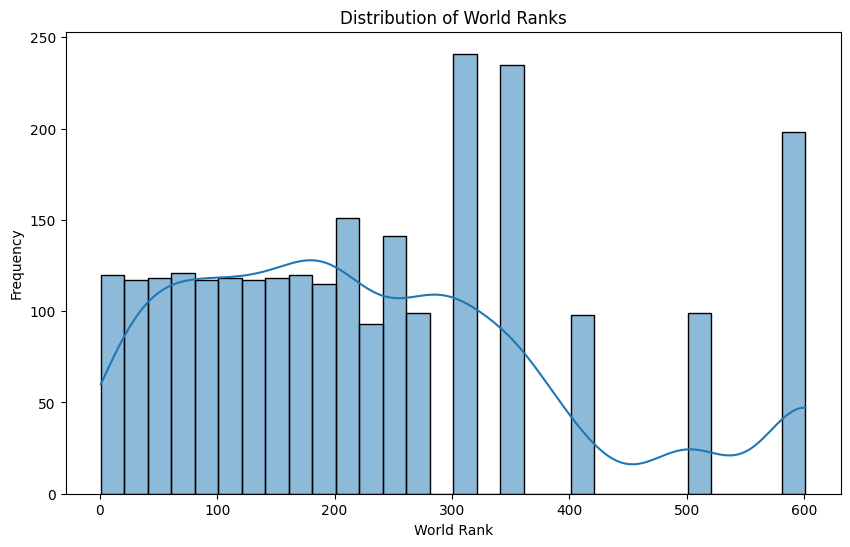

In [7]:
df = df.dropna(subset=['num_students', 'student_staff_ratio', 'international_students'])

# Ensure 'world_rank' is treated as a string before applying string operations
df['world_rank'] = df['world_rank'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(df['world_rank'], bins=30, kde=True)
plt.title('Distribution of World Ranks')
plt.xlabel('World Rank')
plt.ylabel('Frequency')
plt.show()

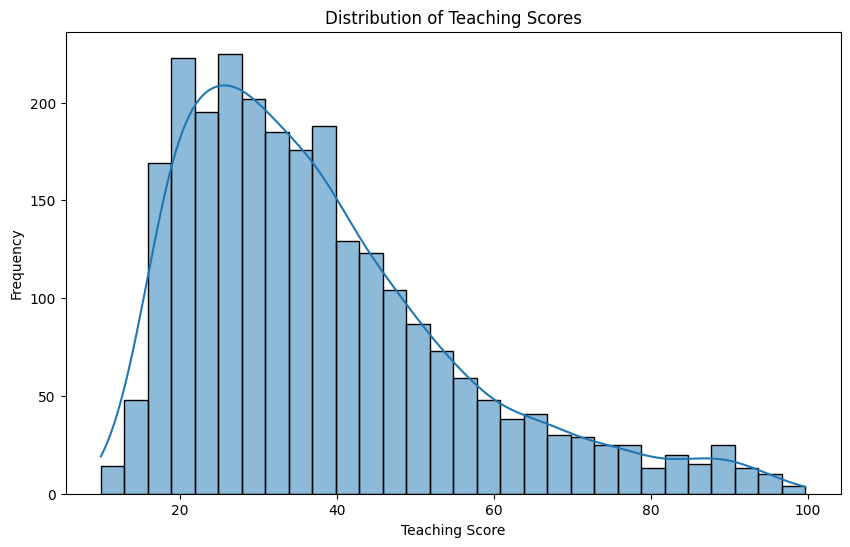

In [8]:
#Teaching Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['teaching'], bins=30, kde=True)
plt.title('Distribution of Teaching Scores')
plt.xlabel('Teaching Score')
plt.ylabel('Frequency')
plt.show()

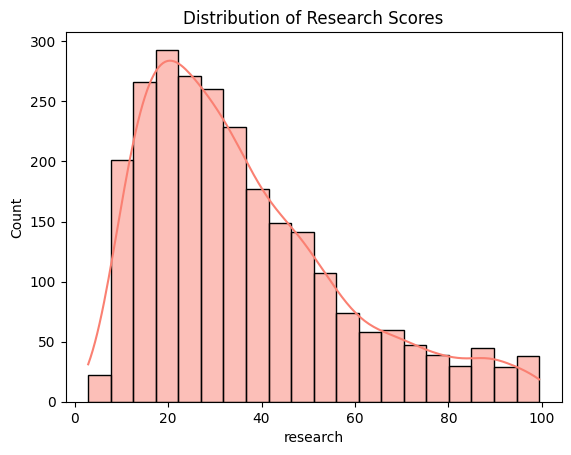

In [9]:
sns.histplot(df['research'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Research Scores')
plt.show()


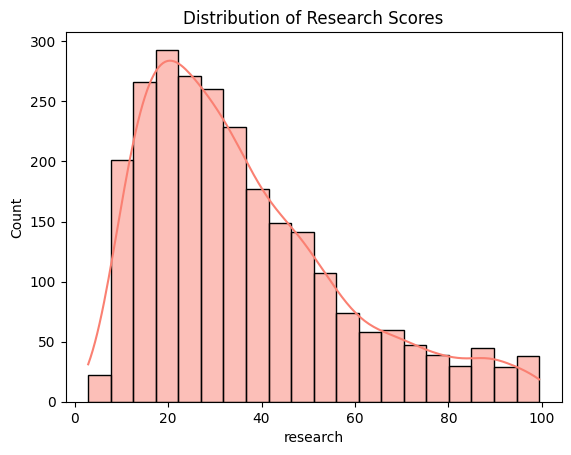

In [10]:
# Research Score Distribution
sns.histplot(df['research'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Research Scores')
plt.show()


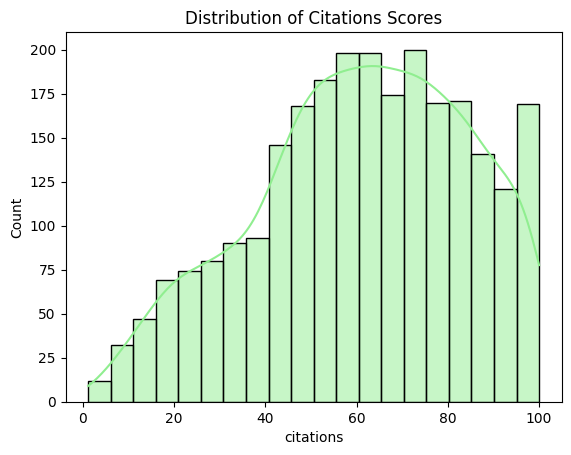

In [11]:
#Citations Score Distribution
sns.histplot(df['citations'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Citations Scores')
plt.show()


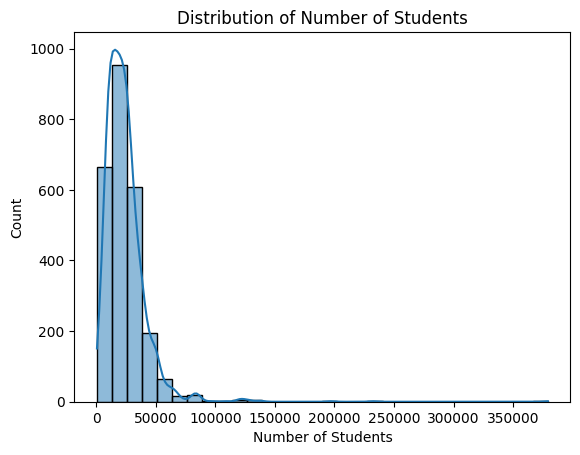

In [12]:
#Student Numbers
sns.histplot(df['num_students'], bins=30, kde=True)
plt.title('Distribution of Number of Students')
plt.xlabel('Number of Students')
plt.show()


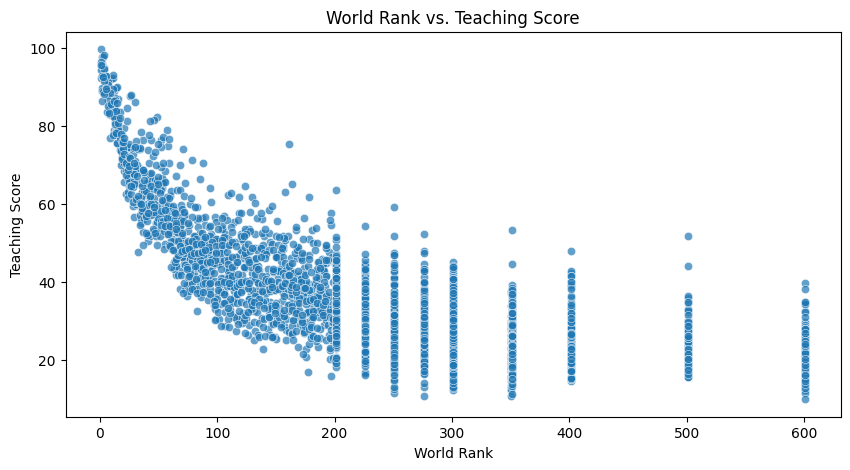

In [13]:
#Bivariate Analysis
#World Rank vs. Teaching Score
plt.figure(figsize=(10,5))
sns.scatterplot(x='world_rank', y='teaching', data=df, alpha=0.7)
plt.title('World Rank vs. Teaching Score')
plt.xlabel('World Rank')
plt.ylabel('Teaching Score')
plt.show()


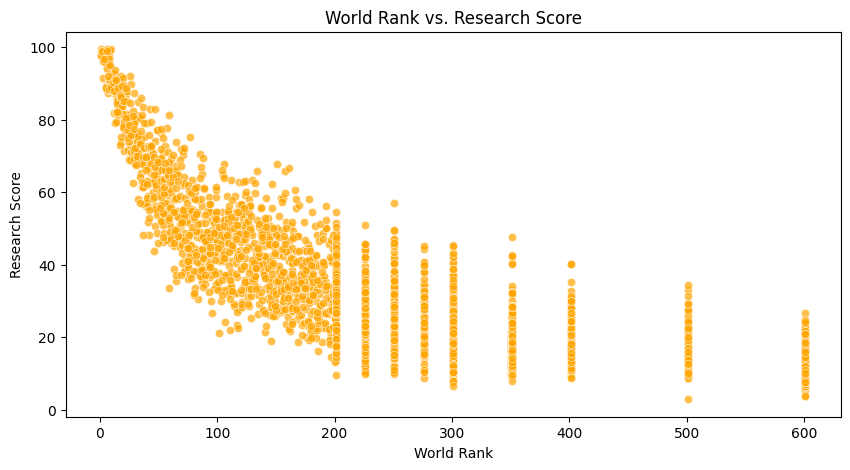

In [14]:
# World Rank vs. Research Score
plt.figure(figsize=(10,5))
sns.scatterplot(x='world_rank', y='research', data=df, alpha=0.7, color='orange') # Change 'world_rank_numeric' to 'world_rank'
plt.title('World Rank vs. Research Score')
plt.xlabel('World Rank')
plt.ylabel('Research Score')
plt.show()


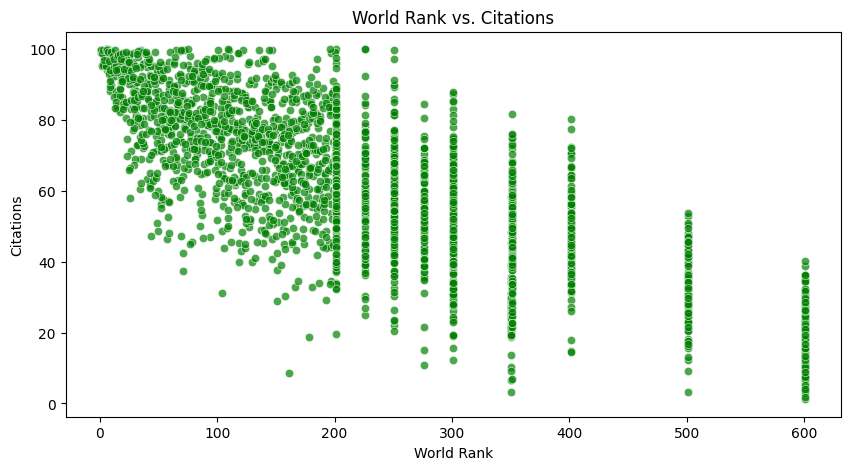

In [15]:
#World Rank vs. Citations
plt.figure(figsize=(10,5))
sns.scatterplot(x='world_rank', y='citations', data=df, alpha=0.7, color='green')
plt.title('World Rank vs. Citations')
plt.xlabel('World Rank')
plt.ylabel('Citations')
plt.show()


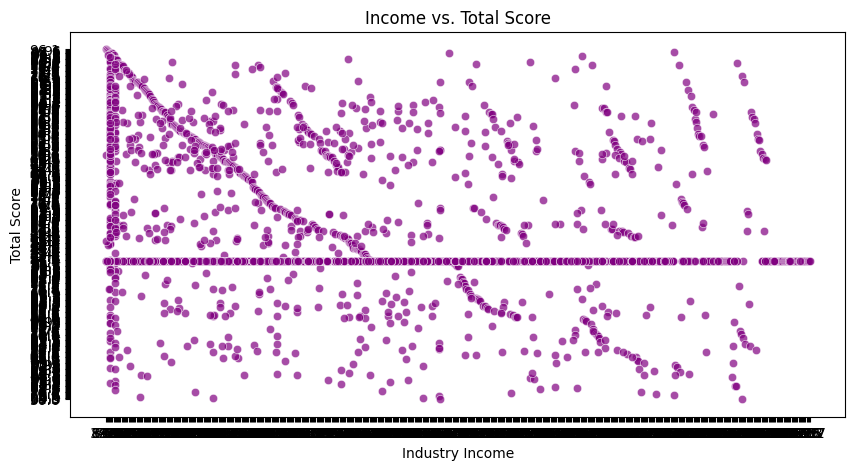

In [16]:
#Income vs. Total Score
plt.figure(figsize=(10,5))
sns.scatterplot(x='income', y='total_score', data=df, alpha=0.7, color='purple')
plt.title('Income vs. Total Score')
plt.xlabel('Industry Income')
plt.ylabel('Total Score')
plt.show()


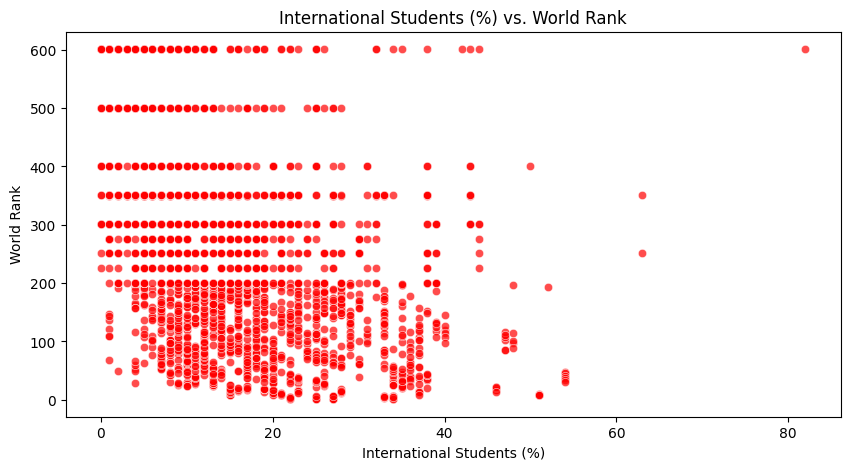

In [17]:
#International Students % vs. World Rank
plt.figure(figsize=(10,5))
sns.scatterplot(x='international_students', y='world_rank', data=df, alpha=0.7, color='red')
plt.title('International Students (%) vs. World Rank')
plt.xlabel('International Students (%)')
plt.ylabel('World Rank')
plt.show()


Country-Level Analysis


<ipython-input-18-b1974f77435d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values , y=top_countries.index, palette='viridis')


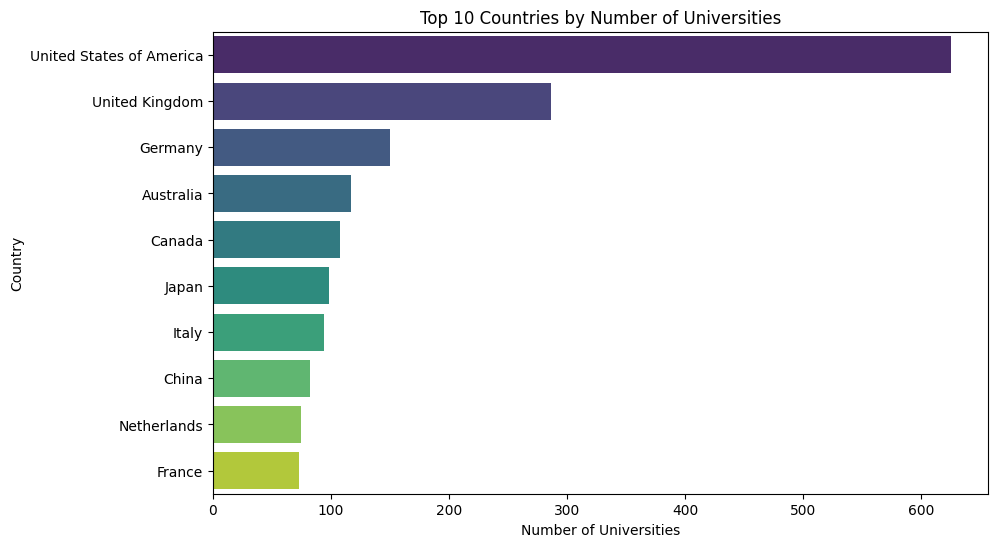

In [18]:
#Top Countries by Number of Universities
top_countries=df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values , y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Universities')
plt.xlabel('Number of Universities')
plt.ylabel('Country')
plt.show()



<ipython-input-19-2d1eb12a90b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=teaching_by_country.values, y=teaching_by_country.index, palette='viridis')


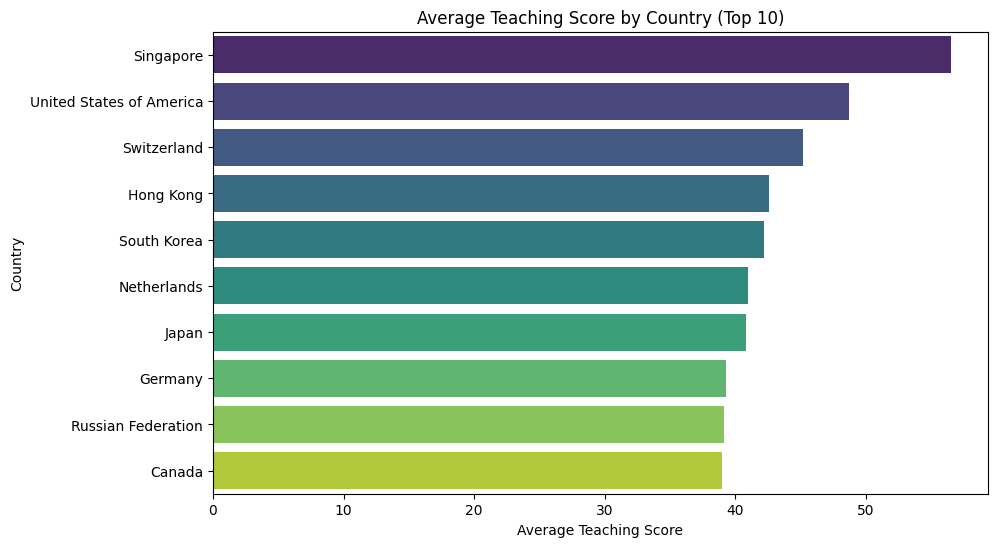

In [19]:
#Average Teaching Score by Country (Top 10)
teaching_by_country=df.groupby('country')['teaching'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=teaching_by_country.values, y=teaching_by_country.index, palette='viridis')
plt.title('Average Teaching Score by Country (Top 10)')
plt.xlabel('Average Teaching Score')
plt.ylabel('Country')
plt.show()

<ipython-input-20-932988745f83>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=research_by_country.values, y=research_by_country.index, palette='coolwarm')


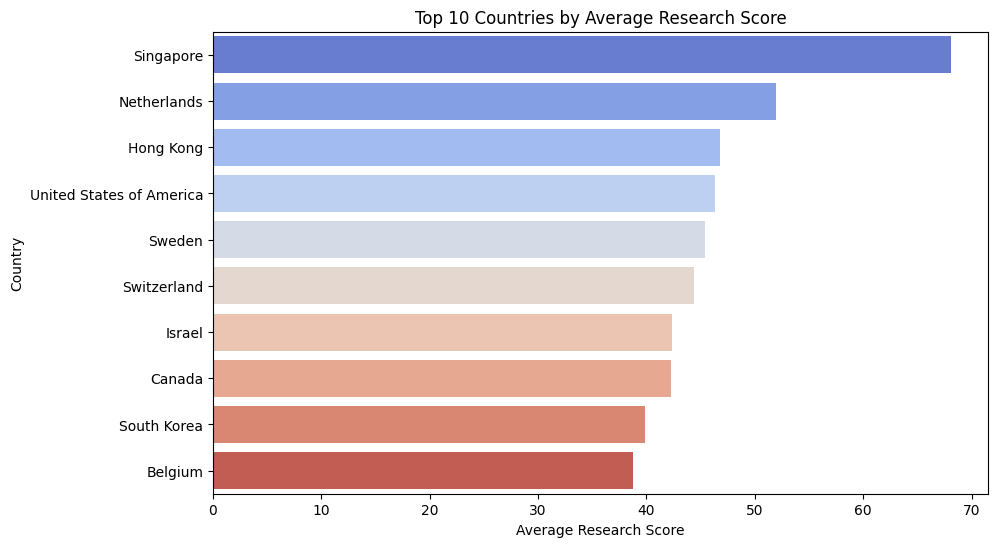

In [20]:
# Average Research Score by Country (Top 10)
research_by_country=df.groupby('country')['research'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=research_by_country.values, y=research_by_country.index, palette='coolwarm')
plt.title('Top 10 Countries by Average Research Score')
plt.xlabel('Average Research Score')
plt.ylabel('Country')
plt.show()

<ipython-input-21-c2b8ce21223d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=citations_by_country.values, y=citations_by_country.index, palette='viridis')


Text(0, 0.5, 'Country')

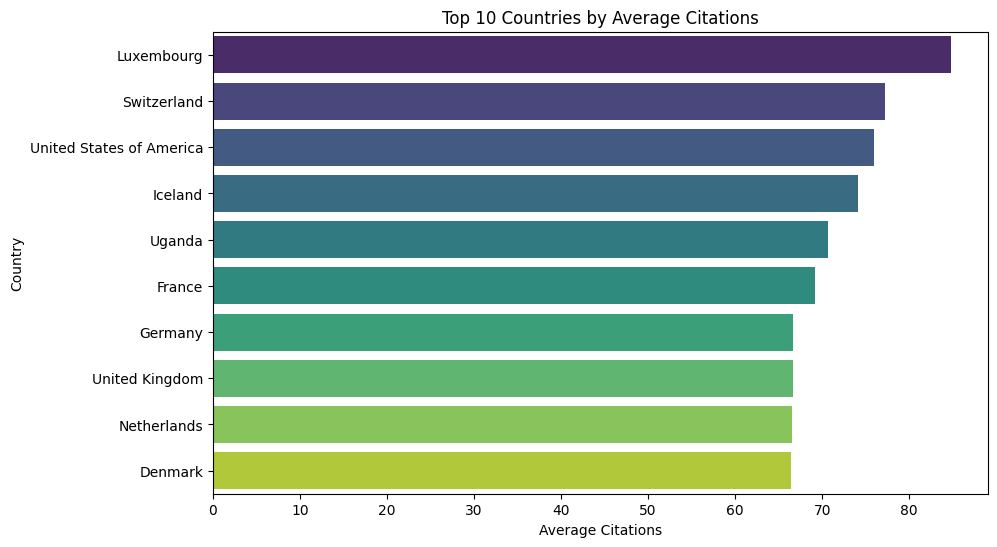

In [21]:
#Citations by Country (Top 10)
citations_by_country=df.groupby('country')['citations'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=citations_by_country.values, y=citations_by_country.index, palette='viridis')
plt.title('Top 10 Countries by Average Citations')
plt.xlabel('Average Citations')
plt.ylabel('Country')

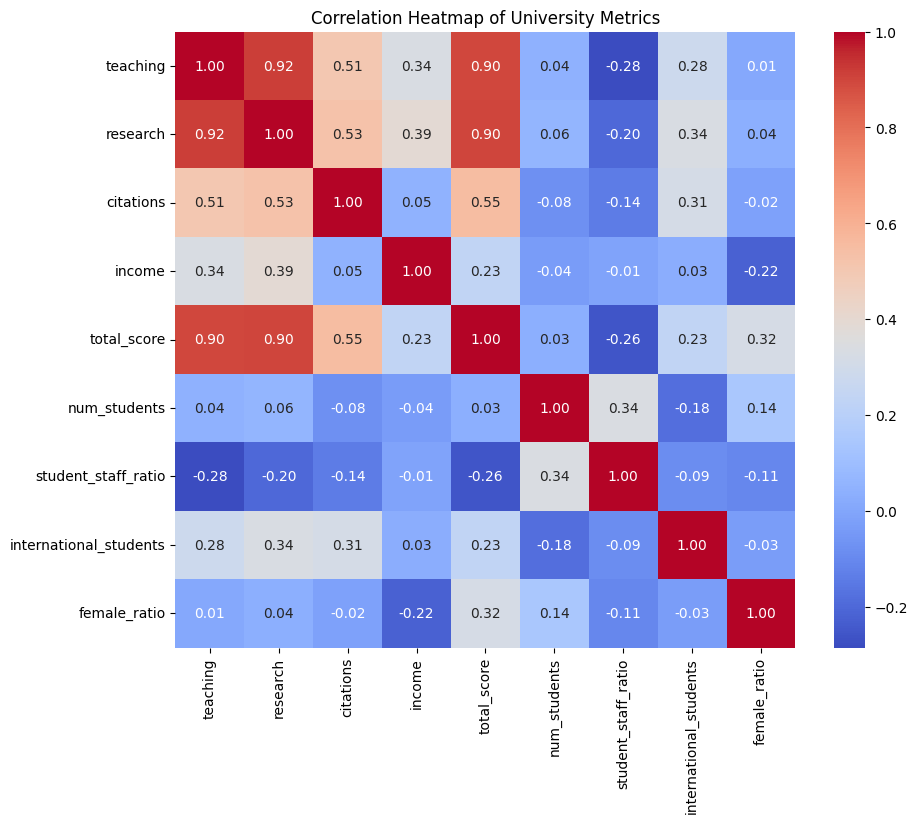

In [23]:
# Select relevant numeric columns
corr_columns = ['teaching', 'research', 'citations', 'income',
                'total_score', 'num_students', 'student_staff_ratio', 'international_students', 'female_ratio']  # Removed 'international'

#Before computing the correlation, convert columns to numeric, handling errors
for col in corr_columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace errors with NaN
    except:
        print(f"Could not convert column {col} to numeric") # Print if any conversion fails


# Compute correlation matrix
corr_matrix = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of University Metrics')
plt.show()

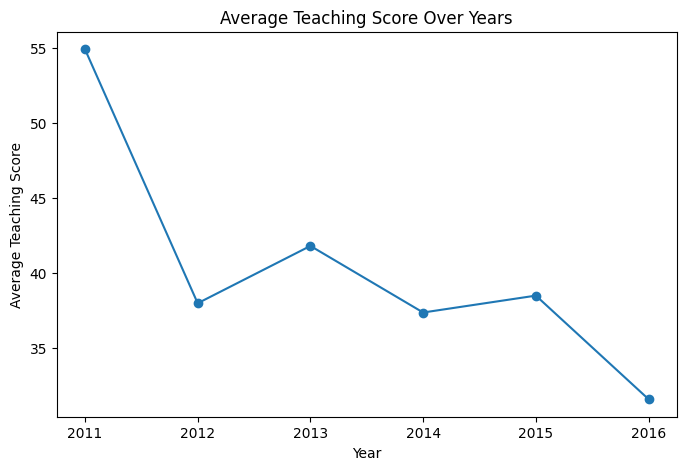

In [24]:
# Yearly Trend Analysis
teaching_trend = df.groupby('year')['teaching'].mean()

plt.figure(figsize=(8,5))
teaching_trend.plot(marker='o')
plt.title('Average Teaching Score Over Years')
plt.xlabel('Year')
plt.ylabel('Average Teaching Score')
plt.show()
